In [ ]:
#imports
import math
import warnings
import os
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

# Importing dataset

In [ ]:
terror = pd.read_csv("/globalterrorismdb_0718dist.csv",encoding="latin1")

In [ ]:
df = pd.DataFrame(terror)
print("Success!")

Success!


In [ ]:
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [ ]:
terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
df.shape

(181691, 135)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day',
                   'country_txt':'Country','provstate':'state',
                   'region_txt':'Region','attacktype1_txt':'AttackType',
                   'target1':'Target','nkill':'Killed','nwound':'Wounded',
                   'summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                   'weaptype1_txt':'Wepon_type','motive':'Motive'},inplace=True)






In [ ]:
for i in df.columns:
    print(i,end=",")

eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,Region,state,city,latitude,longitude,specificity,vicinity,location,Summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,AttackType,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,Target_type,targsubtype1,targsubtype1_txt,corp1,Target,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,Group,gsubname,gname2,gsubname2,gname3,gsubname3,Motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,Wepon_type,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weap

# Cleaning the data

In [ ]:
#Important data
df = df[['Year','Month','Day','Country','state','Region',
         'city','latitude','longitude','AttackType','Killed',
         'Wounded','Target','Summary','Group','Target_type','Wepon_type',
         'Motive']]



In [ ]:
df.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Wepon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [ ]:
#Checking for null values
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Wepon_type          0
Motive         131130
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Wepon_type   181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [ ]:
df.shape

(181691, 18)

In [ ]:
df.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


# Destructive Feature of data

In [ ]:
print("Region with the most attacks: ",terror['Region'].value_counts().idxmax())
print("Country with the most attacks: ",terror['Country'].value_counts().idxmax())
print("City with the most attacks: ",terror['city'].value_counts().index[1])
print("Year with the most attacks: ",terror['Year'].value_counts().idxmax())
print("Month with the most attacks: ",terror['Month'].value_counts().idxmax())
print("Group with the most attacks: ",terror['Group'].value_counts().index[1])
print("Most Attack Types: ",terror['AttackType'].value_counts().idxmax())



Region with the most attacks:  Middle East & North Africa
Country with the most attacks:  Iraq
City with the most attacks:  Baghdad
Year with the most attacks:  2014
Month with the most attacks:  5
Group with the most attacks:  Taliban
Most Attack Types:  Bombing/Explosion


In [ ]:
from wordcloud import WordCloud
from scipy import signal

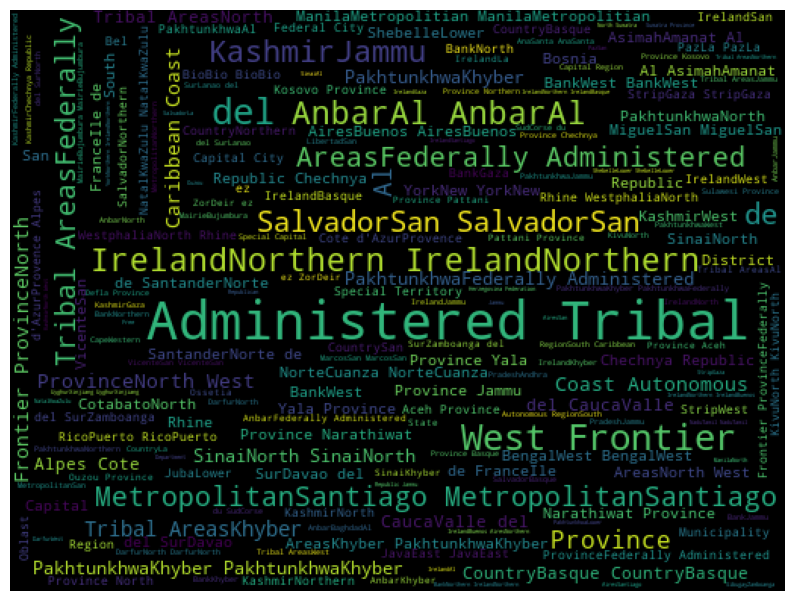

In [ ]:
cities = terror.state.dropna(False)
fig = plt.figure(figsize=(10, 10))
wordcloud = WordCloud(background_color='black',
                      width=512,
                      height=384).generate(''.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()


In [ ]:
df['Year'].value_counts(dropna = False).sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

# Data Visualisation

In [ ]:
attacks = df['Year'].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attacks"})
attacks.head()

,Year,Attacks
0,1970,651
1,1971,471
2,1972,568
3,1973,473
4,1974,581


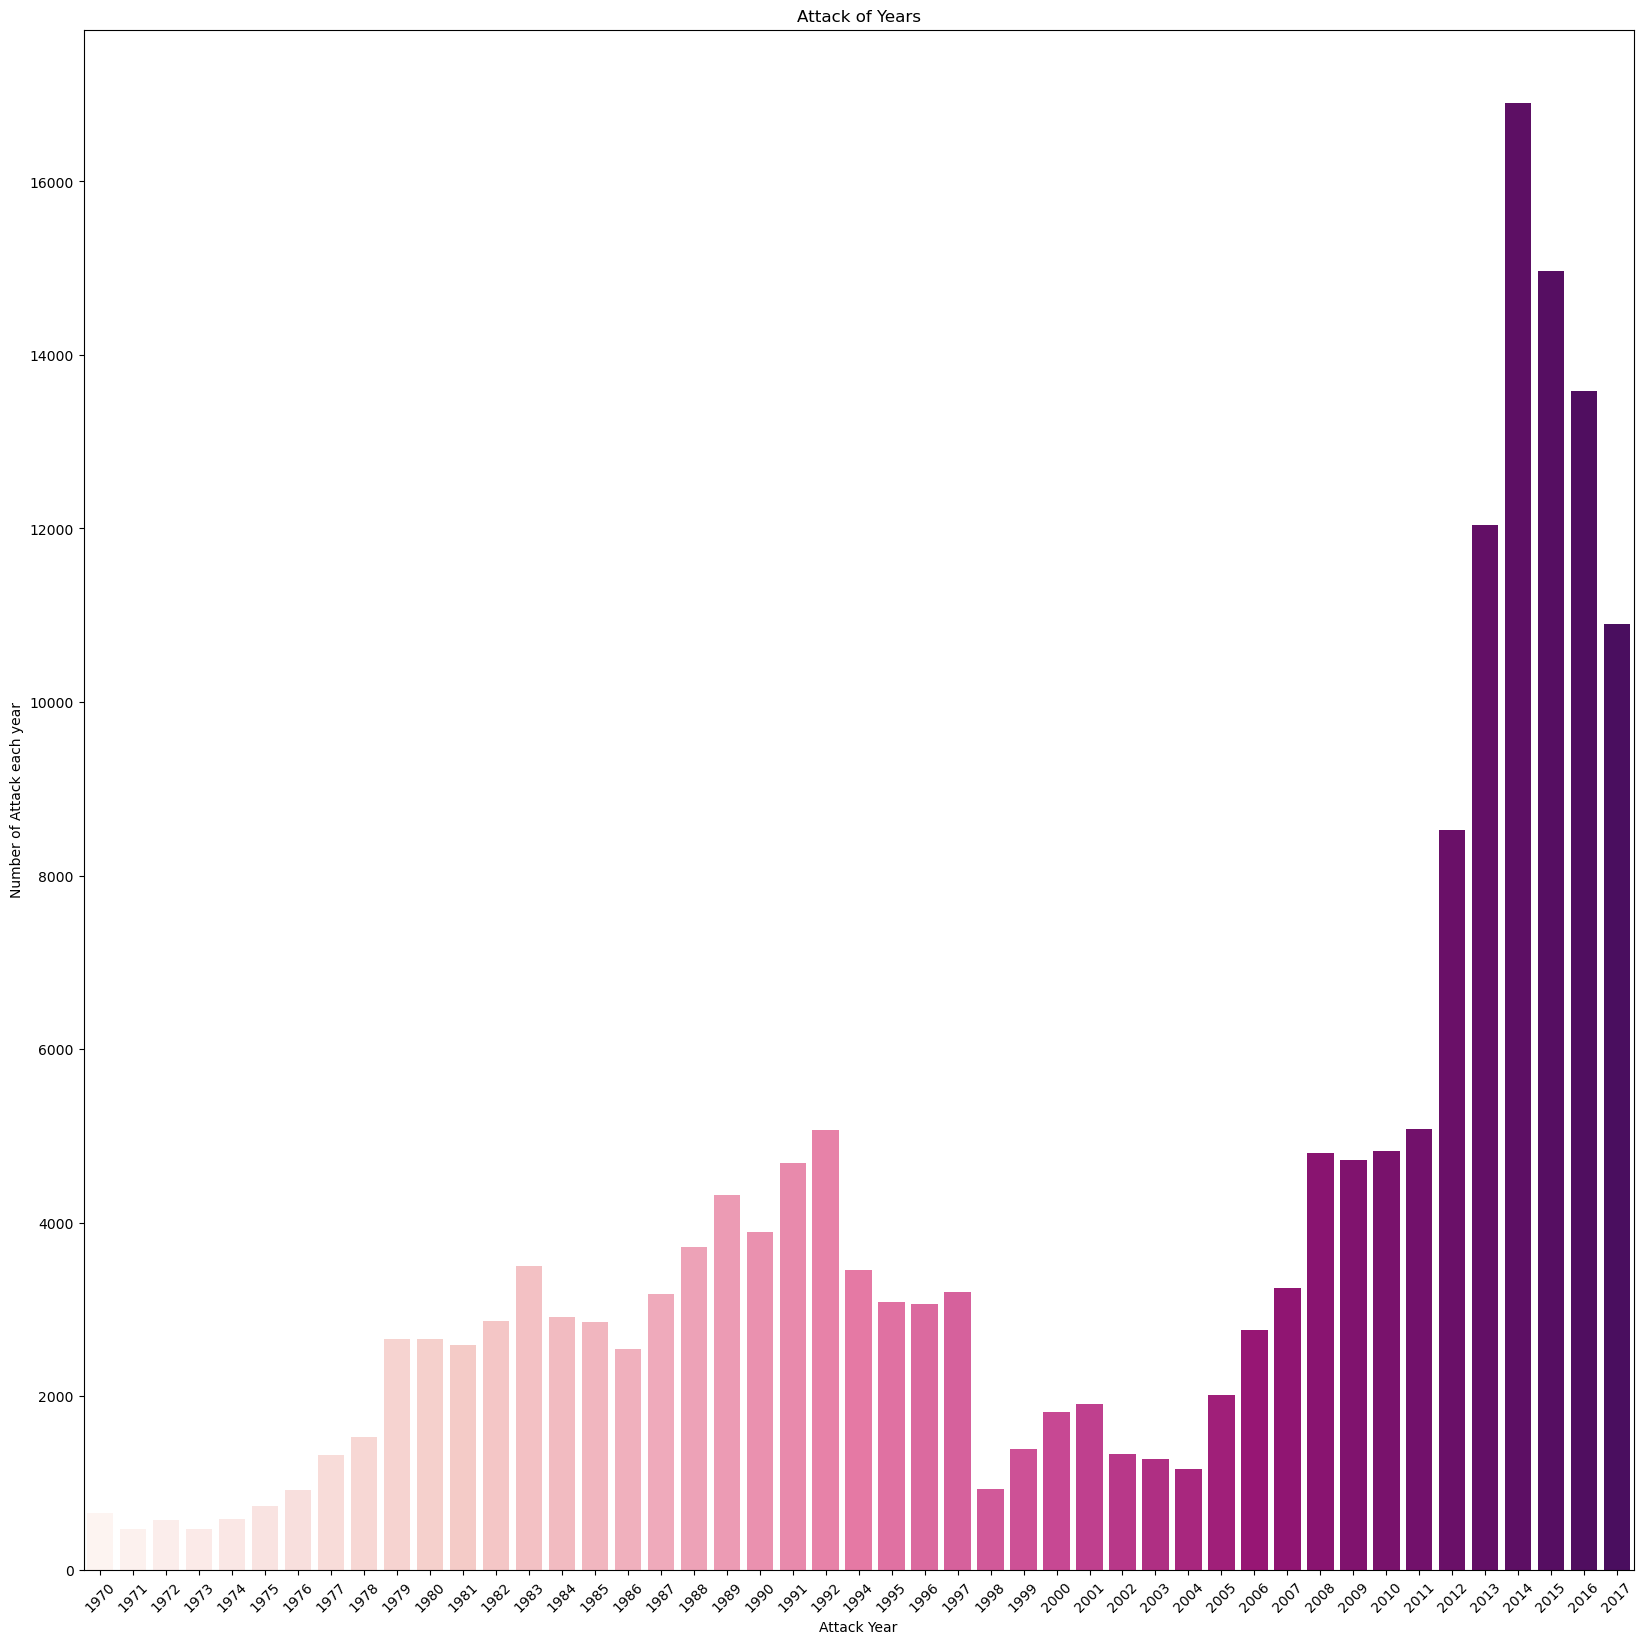

In [ ]:
x_year = terror['Year'].unique()
y_count_years = terror['Year'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(20,20))
sns.barplot(x = x_year,
            y = y_count_years,
            palette='RdPu')
plt.xticks(rotation = 45)
plt.xlabel("Attack Year")
plt.ylabel("Number of Attack each year")
plt.title("Attack of Years")
plt.show()



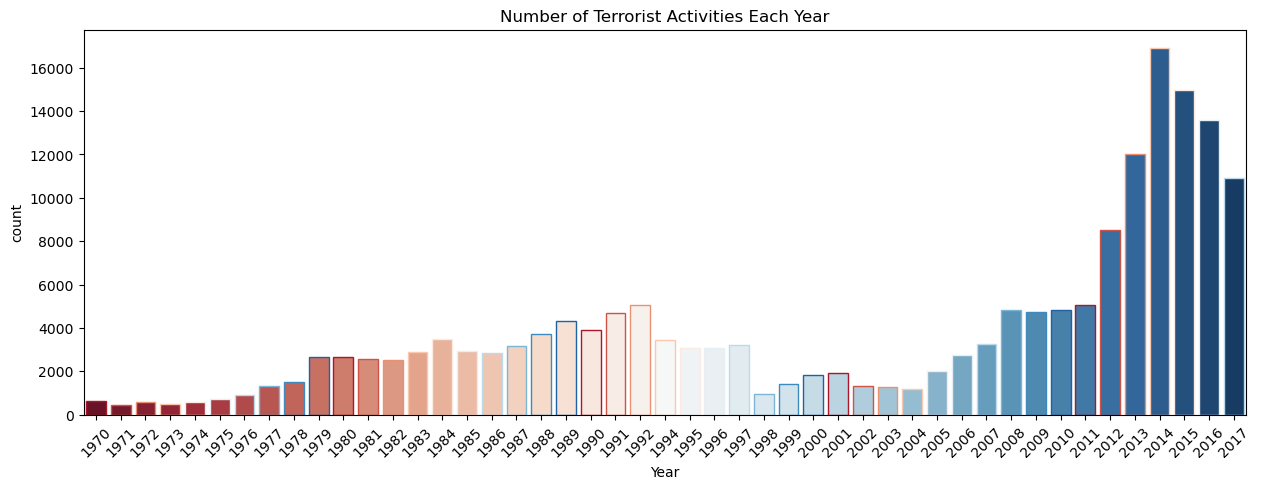

In [ ]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
sns.countplot('Year', data=terror, palette='RdBu', edgecolor=sns.color_palette("RdBu",10), ax=ax)
plt.xticks(rotation = 45)
plt.title("Number of Terrorist Activities Each Year")
plt.show()


# Region Wise Attacks

In [ ]:
reg = pd.crosstab(df.Year, df.Region)
reg.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


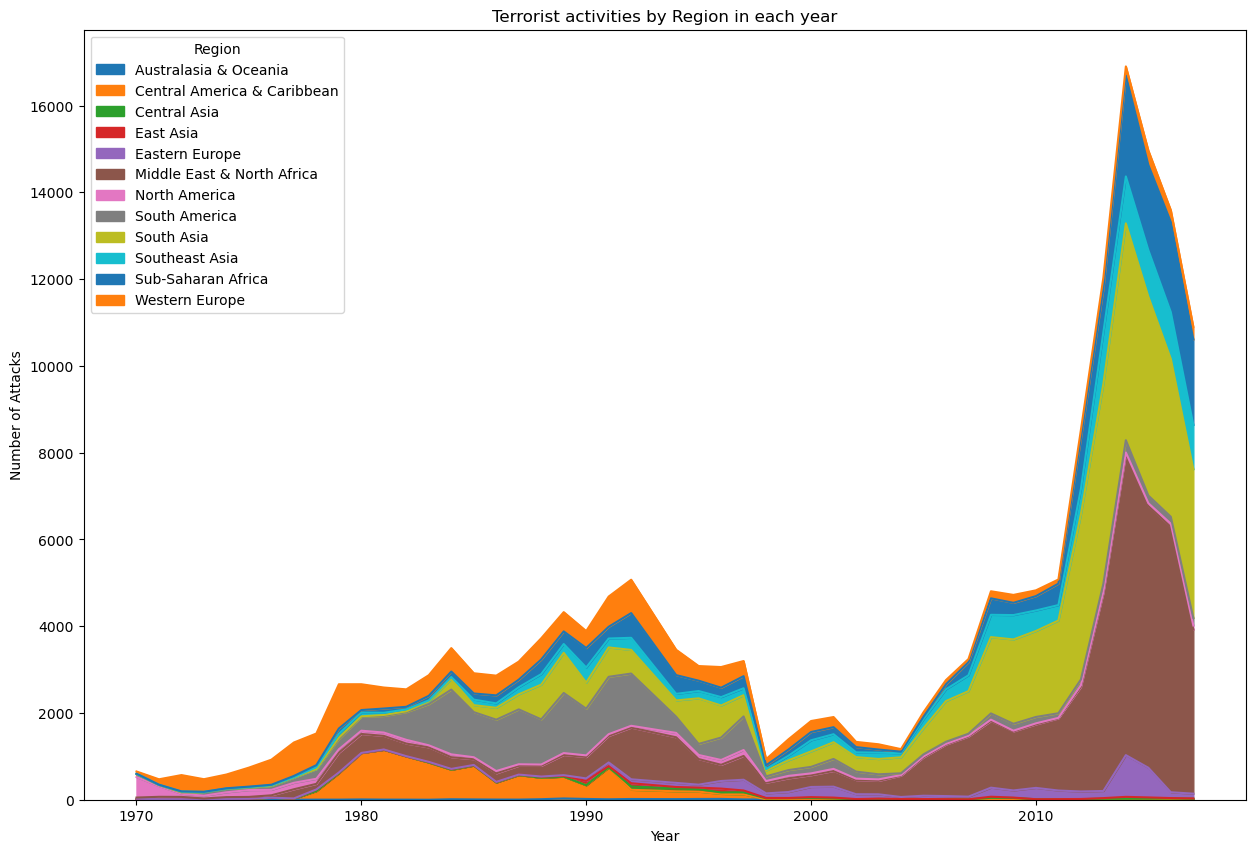

In [ ]:
#Area Plot of Terrorist activities by Region in each year

pd.crosstab(terror.Year,terror.Region).plot(kind='area', figsize=(15,10))
plt.title("Terrorist activities by Region in each year")
plt.ylabel("Number of Attacks")
plt.show()


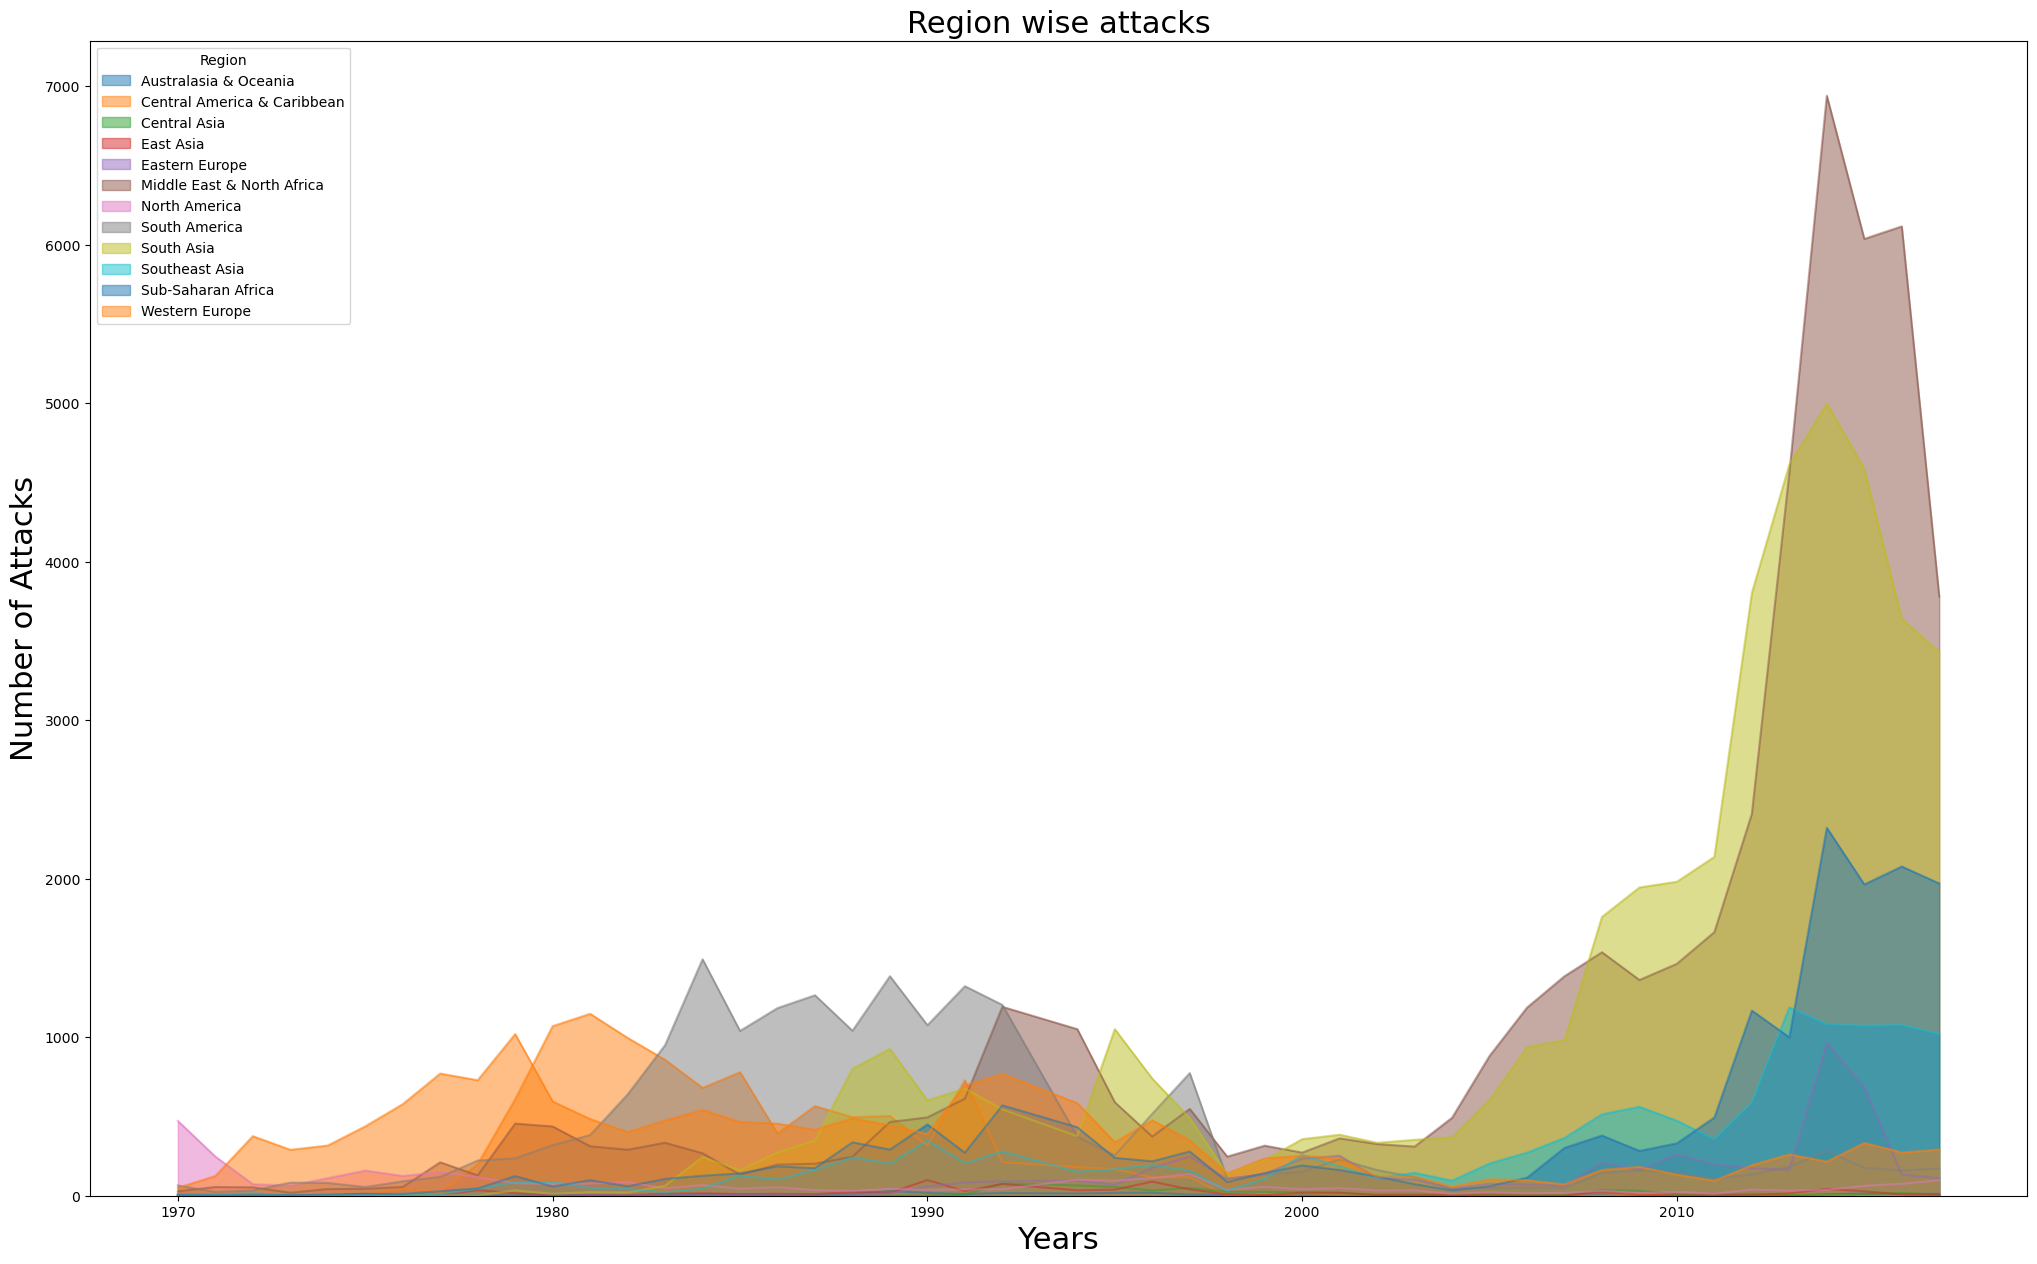

In [ ]:
reg.plot(kind="area", stacked=False,alpha=0.5,figsize=(25,15))
plt.title("Region wise attacks", fontsize=22)
plt.xlabel("Years",fontsize=22)
plt.ylabel("Number of Attacks",fontsize=22)
plt.show()

In [ ]:
regt = reg.transpose()
regt['Total'] = regt.sum(axis=1)
ra=regt['Total'].sort_values(ascending=False)
ra

Region
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Total, dtype: int64

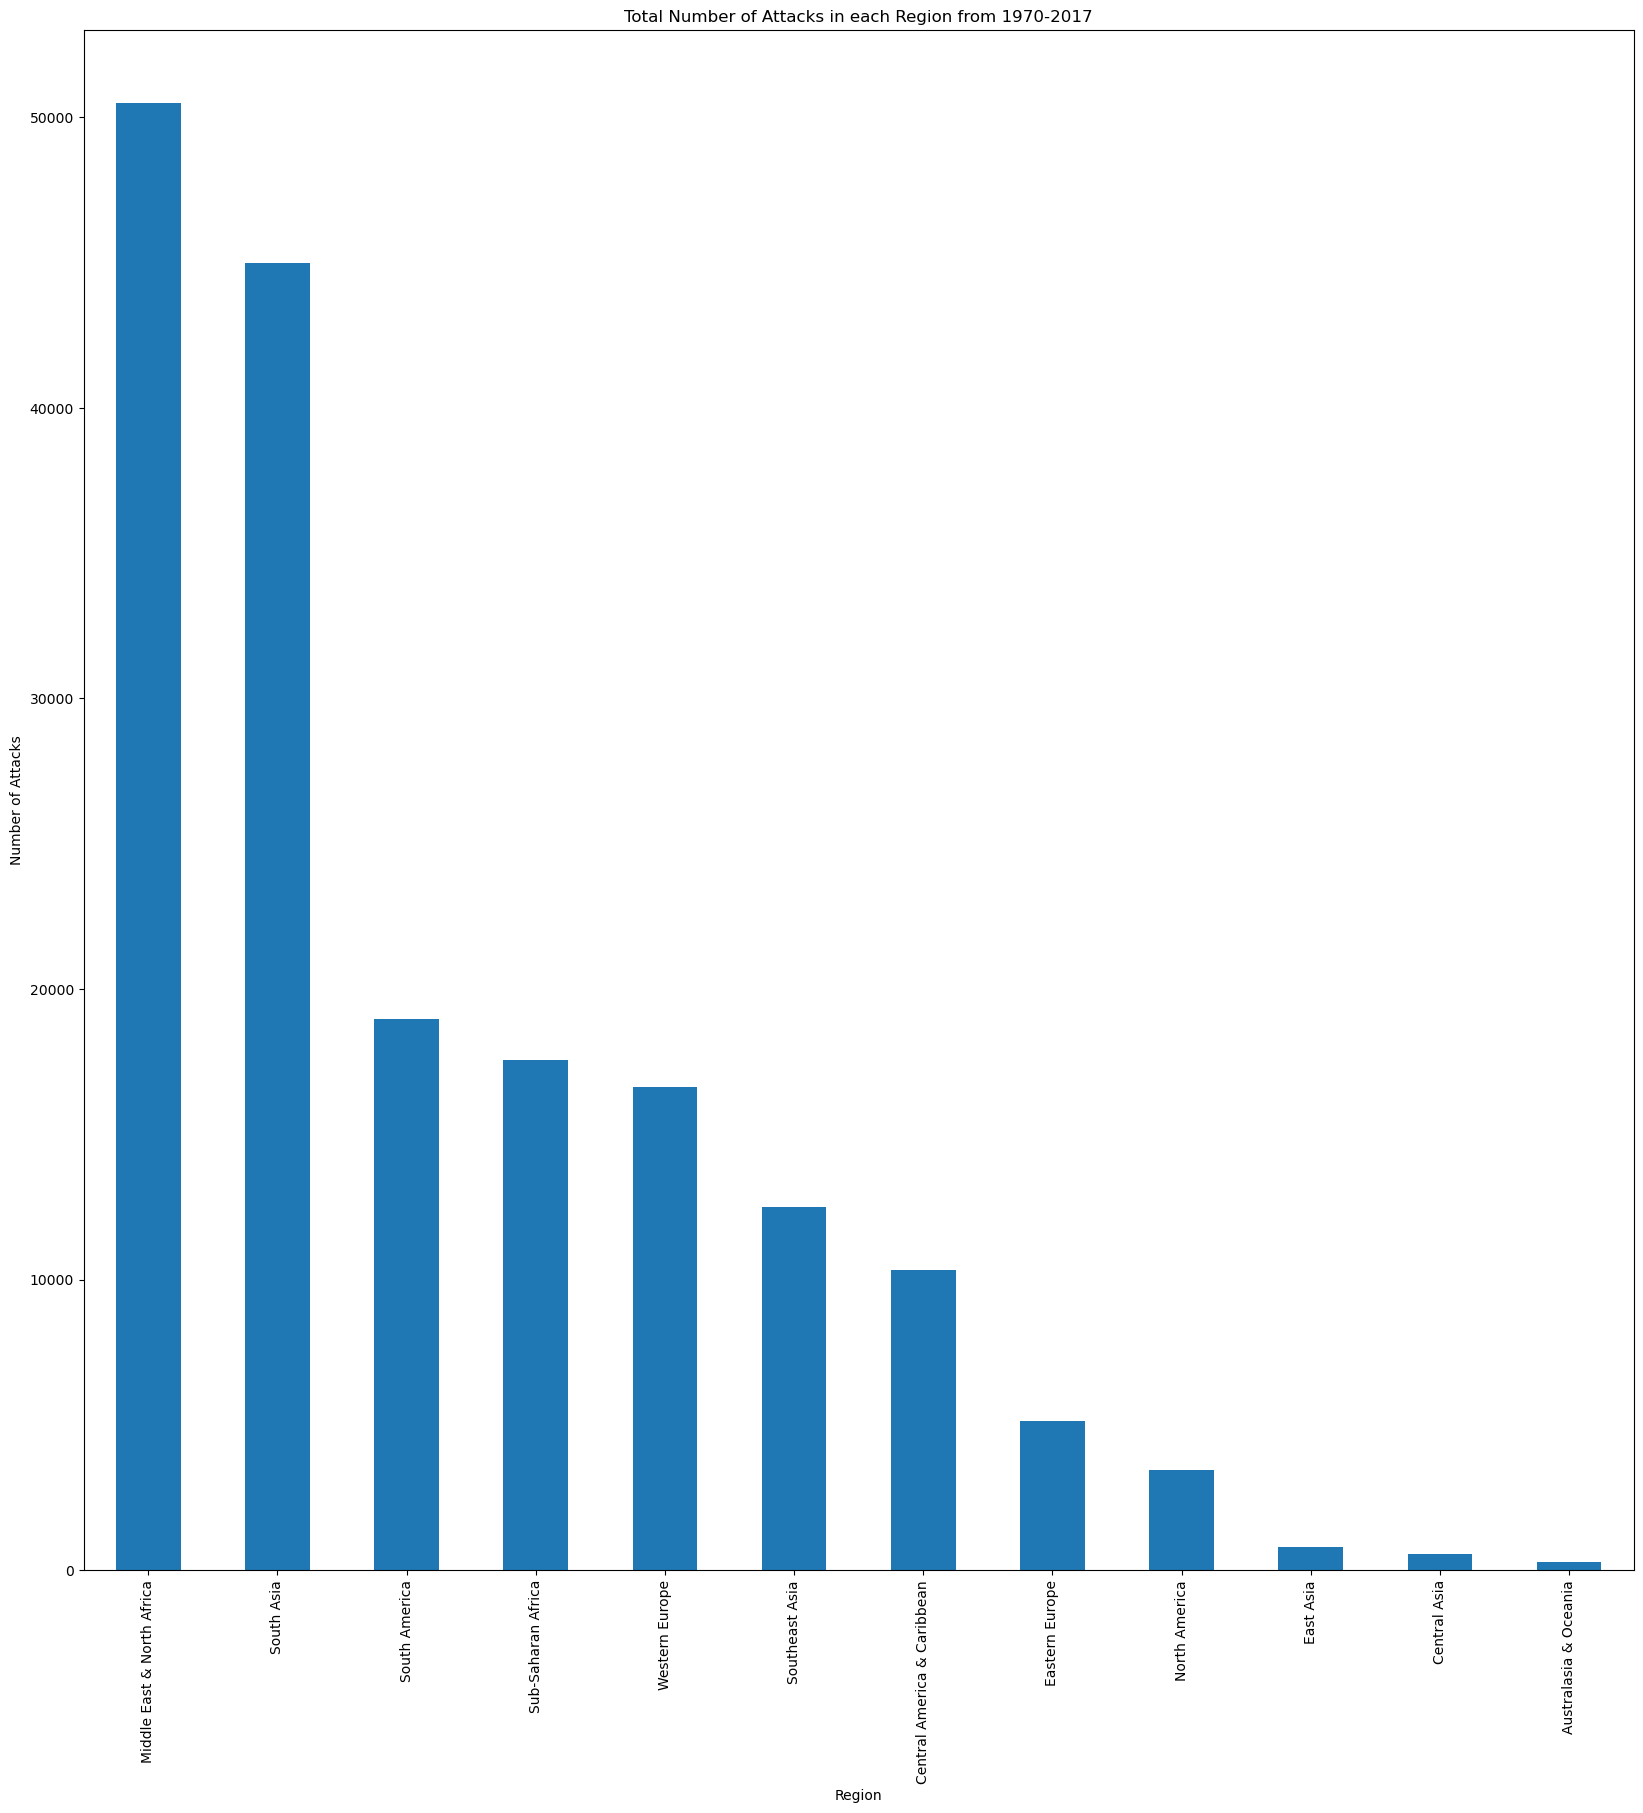

In [ ]:
ra.plot(kind='bar',figsize=(20,20))
plt.title("Total Number of Attacks in each Region from 1970-2017")
plt.xlabel("Region")
plt.ylabel("Number of Attacks")
plt.show()

In [ ]:
terror['Wounded'] = terror['Wounded'].fillna(0).astype(int)
terror['Killed'] = terror['Killed'].fillna(0).astype(int)
terror['casualities'] = terror['Killed']+terror['Wounded']

In [ ]:
terror1 = terror.sort_values(by='casualities',ascending=False)[:40]


In [ ]:
heat = terror1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)

In [ ]:
heat.head()

Year,1982,1984,1992,1994,1995,1996,1997,1998,2001,2004,2005,2006,2007,2008,2009,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,536.0,0.0,584.0
Chad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1161.0,0.0,0.0,0.0,0.0,0.0
Ethiopia,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,520.0,0.0
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1005.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
rk=df[['Region','Killed']].groupby('Region').sum().sort_values(by='Killed',ascending=False)
rk

,Killed
Region,
Middle East & North Africa,137642.0
South Asia,101319.0
Sub-Saharan Africa,78386.0
South America,28849.0
Central America & Caribbean,28708.0
Southeast Asia,15637.0
Eastern Europe,7415.0
Western Europe,6694.0
North America,4916.0


In [ ]:
rw=df[['Region','Wounded']].groupby('Region').sum().sort_values(by='Wounded',ascending=False)
rw

,Wounded
Region,
Middle East & North Africa,214308.0
South Asia,141360.0
Sub-Saharan Africa,52857.0
Southeast Asia,26259.0
North America,21531.0
Western Europe,18332.0
South America,16704.0
Eastern Europe,12045.0
East Asia,9213.0


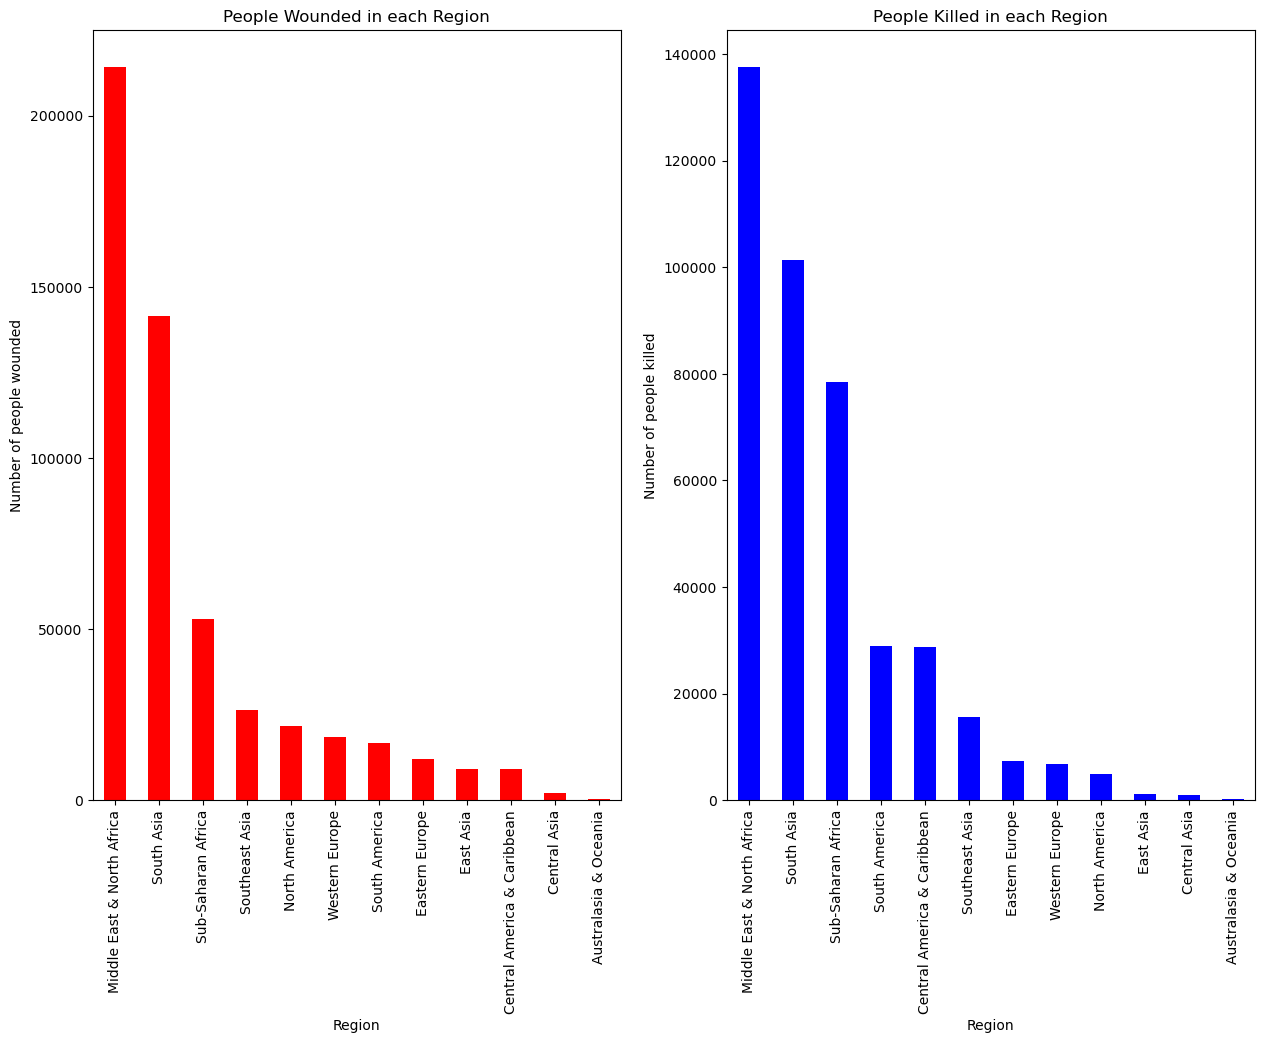

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,10))

terror.groupby(['Region'])['Wounded'].sum().sort_values(ascending=False).plot(kind='bar',color='red',ax=ax1)
ax1.set_title("People Wounded in each Region")
ax1.set_xlabel("Region")
ax1.set_ylabel("Number of people wounded")

terror.groupby(['Region'])['Killed'].sum().sort_values(ascending=False).plot(kind='bar',color='blue',ax=ax2)
ax2.set_title("People Killed in each Region")
ax2.set_xlabel("Region")
ax2.set_ylabel("Number of people killed")

plt.show()


In [ ]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0,'#edf8fb'],[.3,'#00BFFF'],[.6,'#8856a7'],[1,'#810f7c']]
heatmap = go.Heatmap(z=heat.values,x=heat.columns,y=heat.index,colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
	title = 'Top 40 worst terror attacks in history from 1982 to 2016',
	xaxis = dict(ticks='',nticks=20),
	yaxis = dict(ticks='')
)

fig = go.Figure(data=data,layout=layout)
py.iplot(fig, filename=heatmap,show_link=False)





In [ ]:
terror.Country.value_counts()[:15]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Country, dtype: int64

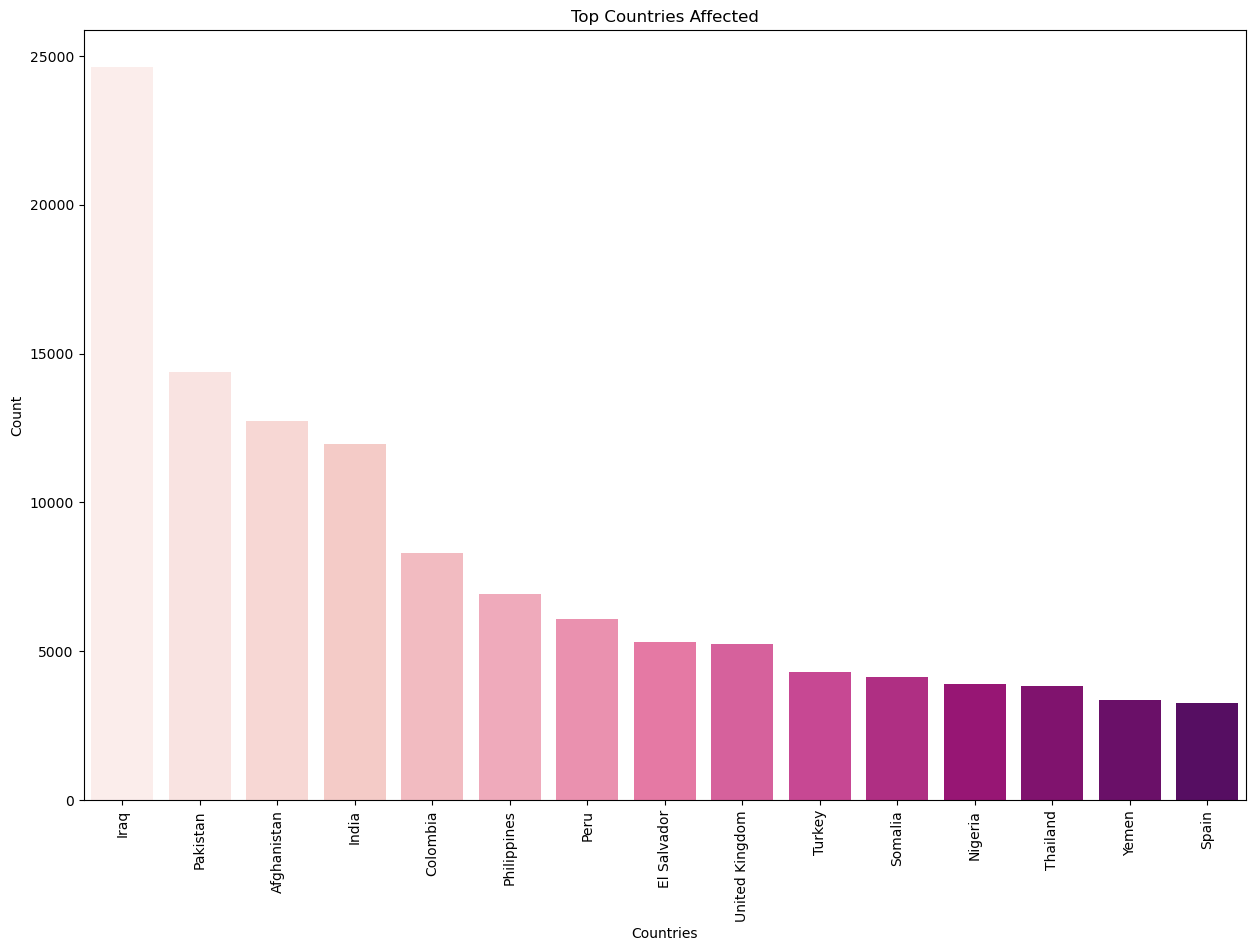

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(terror['Country'].value_counts()[:15].index,terror['Country'].value_counts()[:15].values,palette='RdPu')
plt.title("Top Countries Affected")
plt.xlabel("Countries")
plt.ylabel("Count")
plt.xticks(rotation = 90)
plt.show()


# Terrorist Attacks of a Perticular year and their Locations

In [ ]:
import folium 
from folium.plugins import MarkerCluster
filterYear = terror['Year'] == 1970

In [ ]:
filterData = terror[filterYear]
reqFilterData = filterData.loc[:,'city':'longitude']
reqFilterData = reqFilterData.dropna()
reqFilterDataList = reqFilterData.values.tolist()


In [ ]:
map = folium.Map(location=[0,30],tiles='CartoDB positron',zoom_start=2)

#clutered marker

markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]],
                  popup=reqFilterDataList[point][0]).add_to(markerCluster)

map

In [ ]:
terror.Group.value_counts()[1:15]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
Name: Group, dtype: int64

In [ ]:
test = terror[terror.Group.isin(['Shining Path (SL)','Taliban','Islamic State of Iraq and the Levant (ISIL)'])]

In [ ]:
test.Country.unique()

array(['Peru', 'Bolivia', 'Colombia', 'Argentina', 'Brazil', 'Mexico',
       'Afghanistan', 'Pakistan', 'Syria', 'Iraq', 'Turkey', 'Tunisia',
       'Lebanon', 'Turkmenistan', 'Israel', 'Belgium', 'Egypt', 'Libya',
       'Saudi Arabia', 'West Bank and Gaza Strip', 'France', 'Bahrain',
       'Jordan', 'Somalia', 'Germany', 'Yemen', 'Philippines', 'Malaysia',
       'Indonesia', 'Russia', 'Georgia', 'United Kingdom', 'Iran',
       'Australia'], dtype=object)

In [ ]:
terror_df_group = terror.dropna(subset=['latitude','longitude'])
terror_df_group = terror_df_group.drop_duplicates(subset=['Country','Group'])
terrorist_groups = terror.Group.value_counts()[1:8].index.tolist()
terror_df_group = terror_df_group.loc[terror_df_group.Group.isin(terrorist_groups)]
print(terror_df_group.Group.unique())


["New People's Army (NPA)" 'Irish Republican Army (IRA)'
 'Shining Path (SL)' 'Farabundo Marti National Liberation Front (FMLN)'
 'Taliban' 'Al-Shabaab' 'Islamic State of Iraq and the Levant (ISIL)']


In [ ]:
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(terror_df_group)):
    folium.Marker([terror_df_group.iloc[point]['latitude'],terror_df_group.iloc[point]['longitude']],
                  popup='Group:{}<br>Country:{}'.format(terror_df_group.iloc[point]['Group'],
                  terror_df_group.iloc[point]['Country'])).add_to(map)
map

In [ ]:
terror.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,casualities
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,1
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,PGIS,0,1,1,1,NaN,0
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,1
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,0
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,0


In [ ]:
#total number of people killed in terror attack
killdata = terror.loc[:,'Killed']
print("Number of people kileld by terror attack: ",int(sum(killdata.dropna())))


Number of people kileld by terror attack:  411868


In [ ]:
#What type of attacks these deaths were made of
attackdata = terror.loc[:,'AttackType']
typeKilldata = pd.concat([attackdata,killdata],axis=1)

In [ ]:
typeKilldata.head()

,AttackType,Killed
0,Assassination,1
1,Hostage Taking (Kidnapping),0
2,Assassination,1
3,Bombing/Explosion,0
4,Facility/Infrastructure Attack,0


In [ ]:
typeKillFormatData = typeKilldata.pivot_table(columns='AttackType',values='Killed',aggfunc='sum')
typeKillFormatData

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,160297,24920,157321,3642,3718,4478,24231,880,32381


In [ ]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Killed to Killed
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Armed Assault                        1 non-null      int64
 1   Assassination                        1 non-null      int64
 2   Bombing/Explosion                    1 non-null      int64
 3   Facility/Infrastructure Attack       1 non-null      int64
 4   Hijacking                            1 non-null      int64
 5   Hostage Taking (Barricade Incident)  1 non-null      int64
 6   Hostage Taking (Kidnapping)          1 non-null      int64
 7   Unarmed Assault                      1 non-null      int64
 8   Unknown                              1 non-null      int64
dtypes: int64(9)
memory usage: 188.0+ bytes


In [ ]:
countryData = terror.loc[:'Country']
countryKillData = pd.concat([countryData,killdata],axis=1)

In [ ]:
countryKillFormatData = countryKillData.pivot_table(columns='Country',values = 'Killed',aggfunc='sum')
countryKillFormatData

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Killed,39384,42,11066,0,3043,0,490,37,23,30,...,1,0,1500,97,1,8776,119,324,70,154
Killed,39384,42,11066,0,3043,0,490,37,23,30,...,1,0,1500,97,1,8776,119,324,70,154


In [ ]:
fig_size = plt.rcParams['figure.figsize']
fig_size[0] = 25
fig_size[1] = 25
plt.rcParams['figure.figsize'] = fig_size

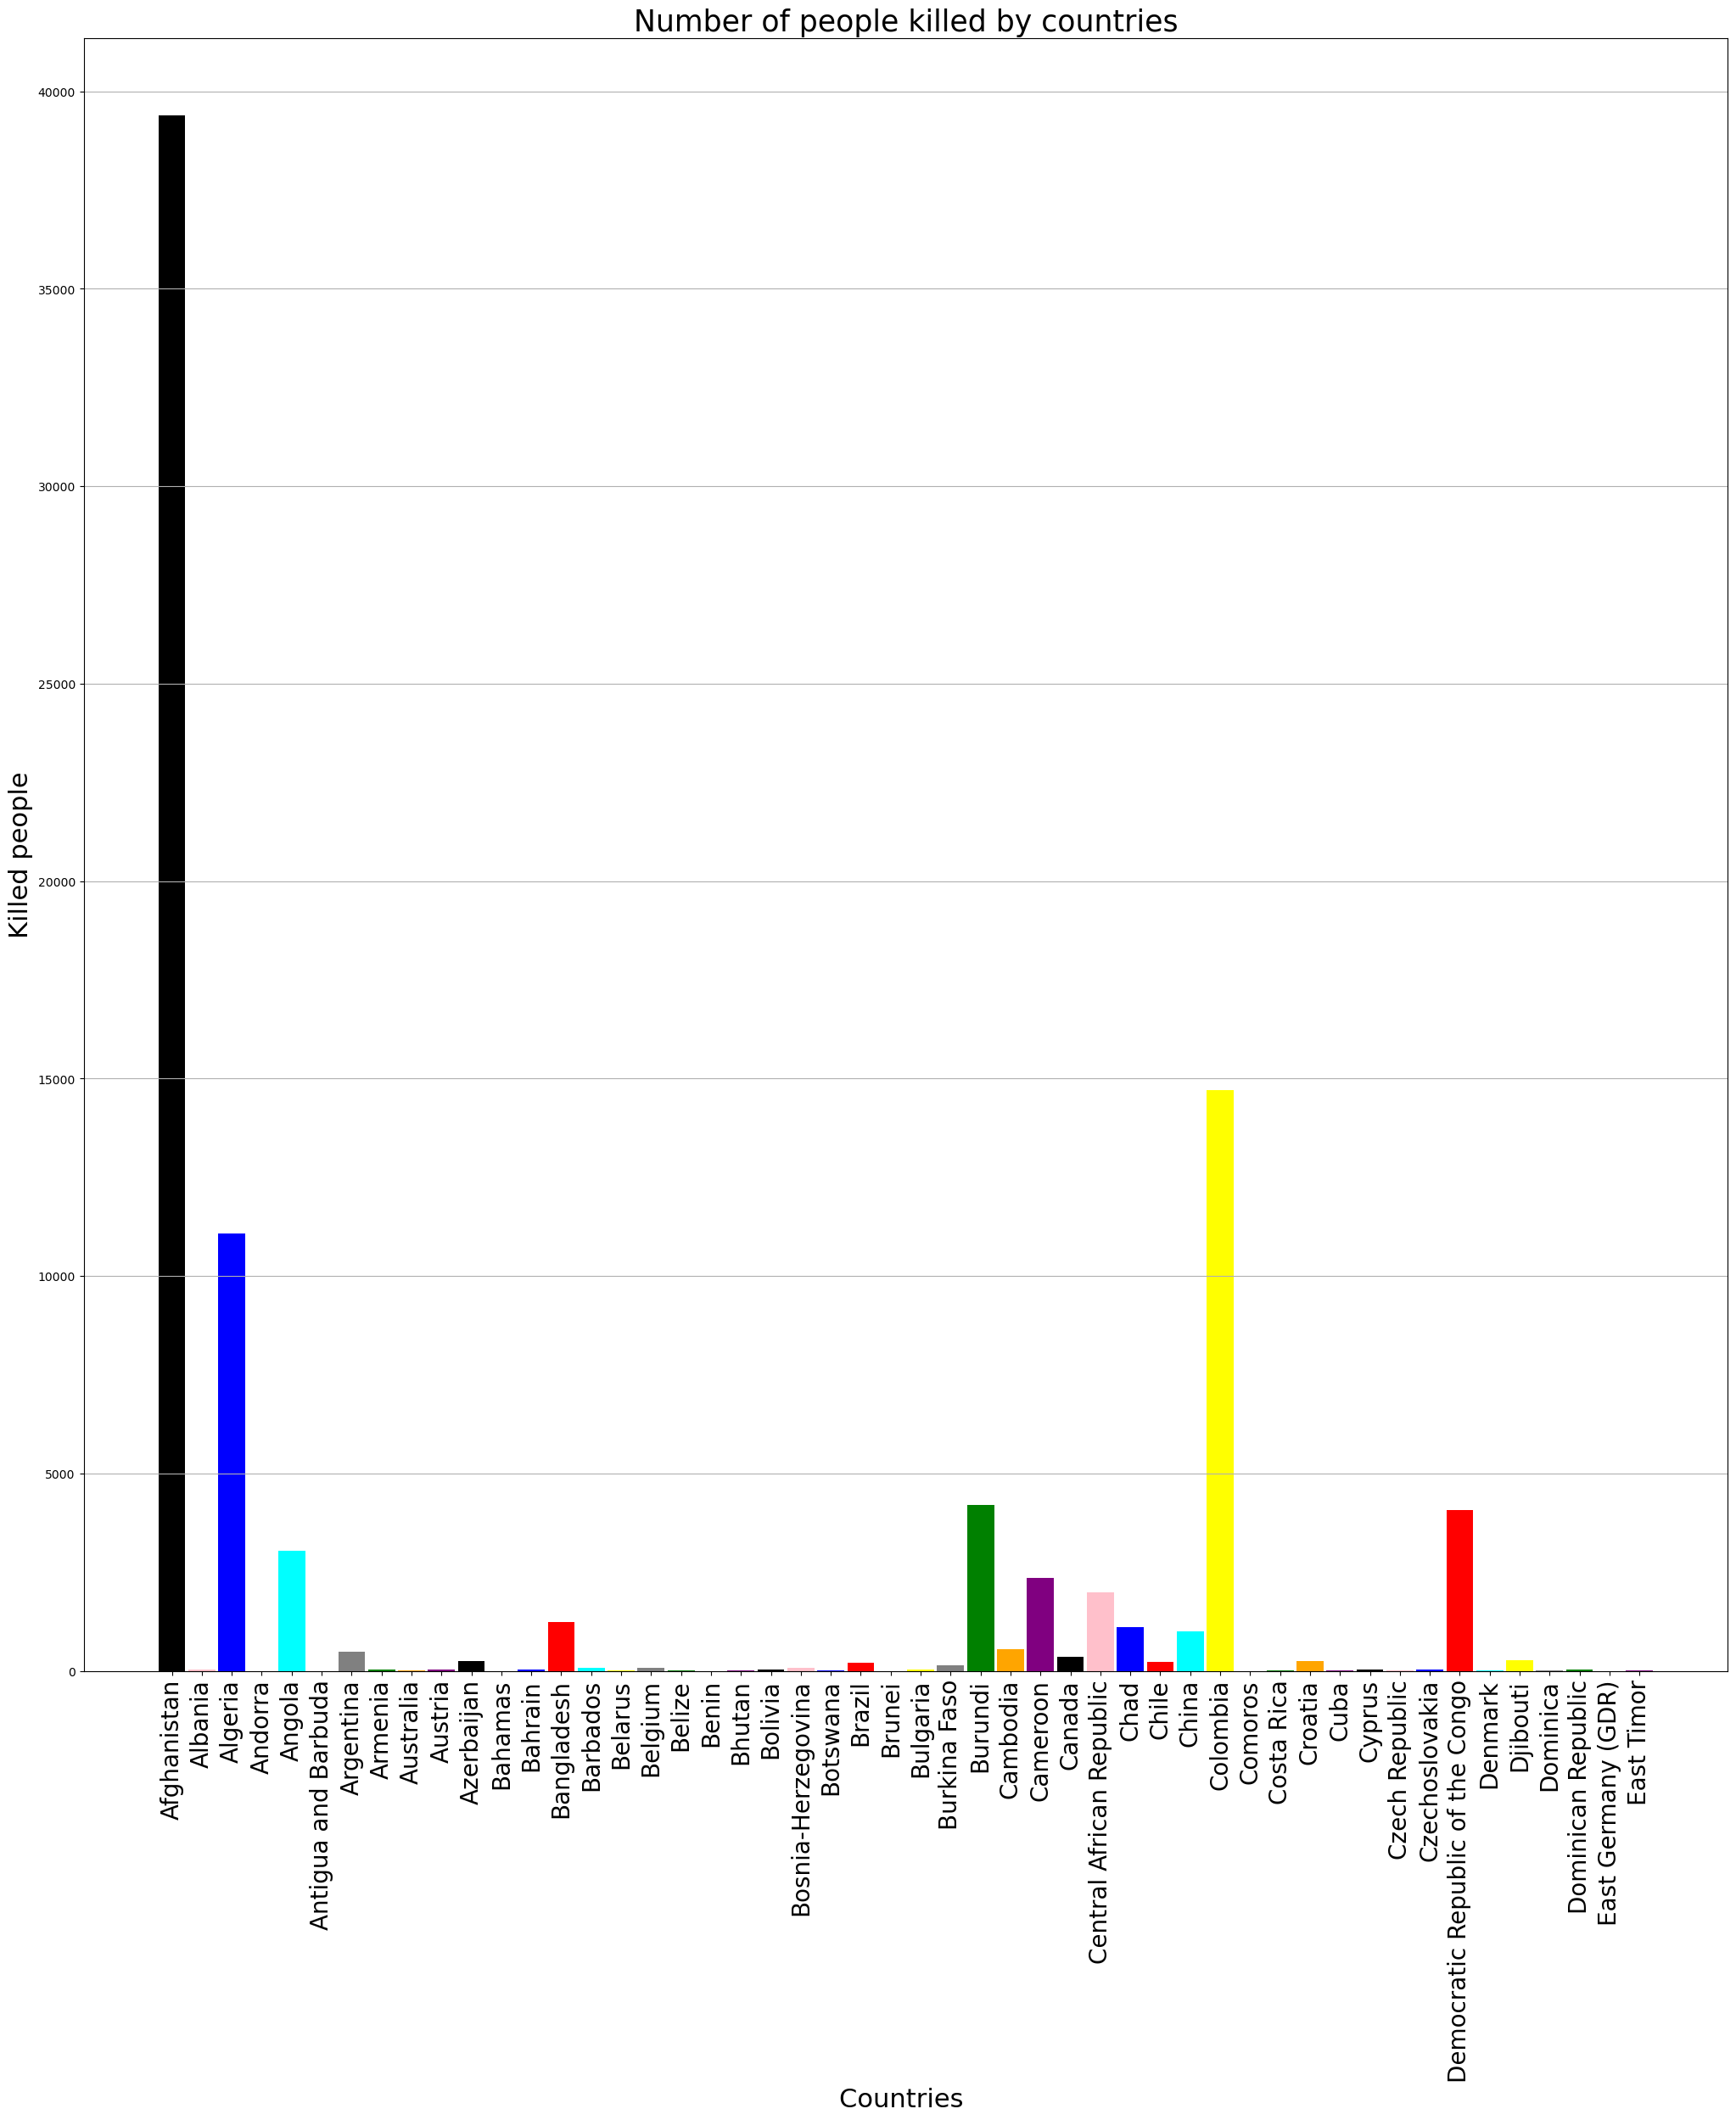

In [ ]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values]
colors = ['black','pink','blue','red','cyan','yellow','gray','green','orange','purple']
fig,ax = plt.subplots(1,1)
ax.yaxis.grid(True)
fig_size = plt.rcParams['figure.figsize']
fig_size[0] = 25
fig_size[1] = 25
plt.rcParams['figure.figsize'] = fig_size
plt.bar(index,values,color = colors,width=0.9)
plt.ylabel("Killed people",fontsize=22)
plt.xlabel("Countries ",fontsize=22)
plt.xticks(index,labels,fontsize=20,rotation=90)
plt.title("Number of people killed by countries",fontsize=25)
plt.show()




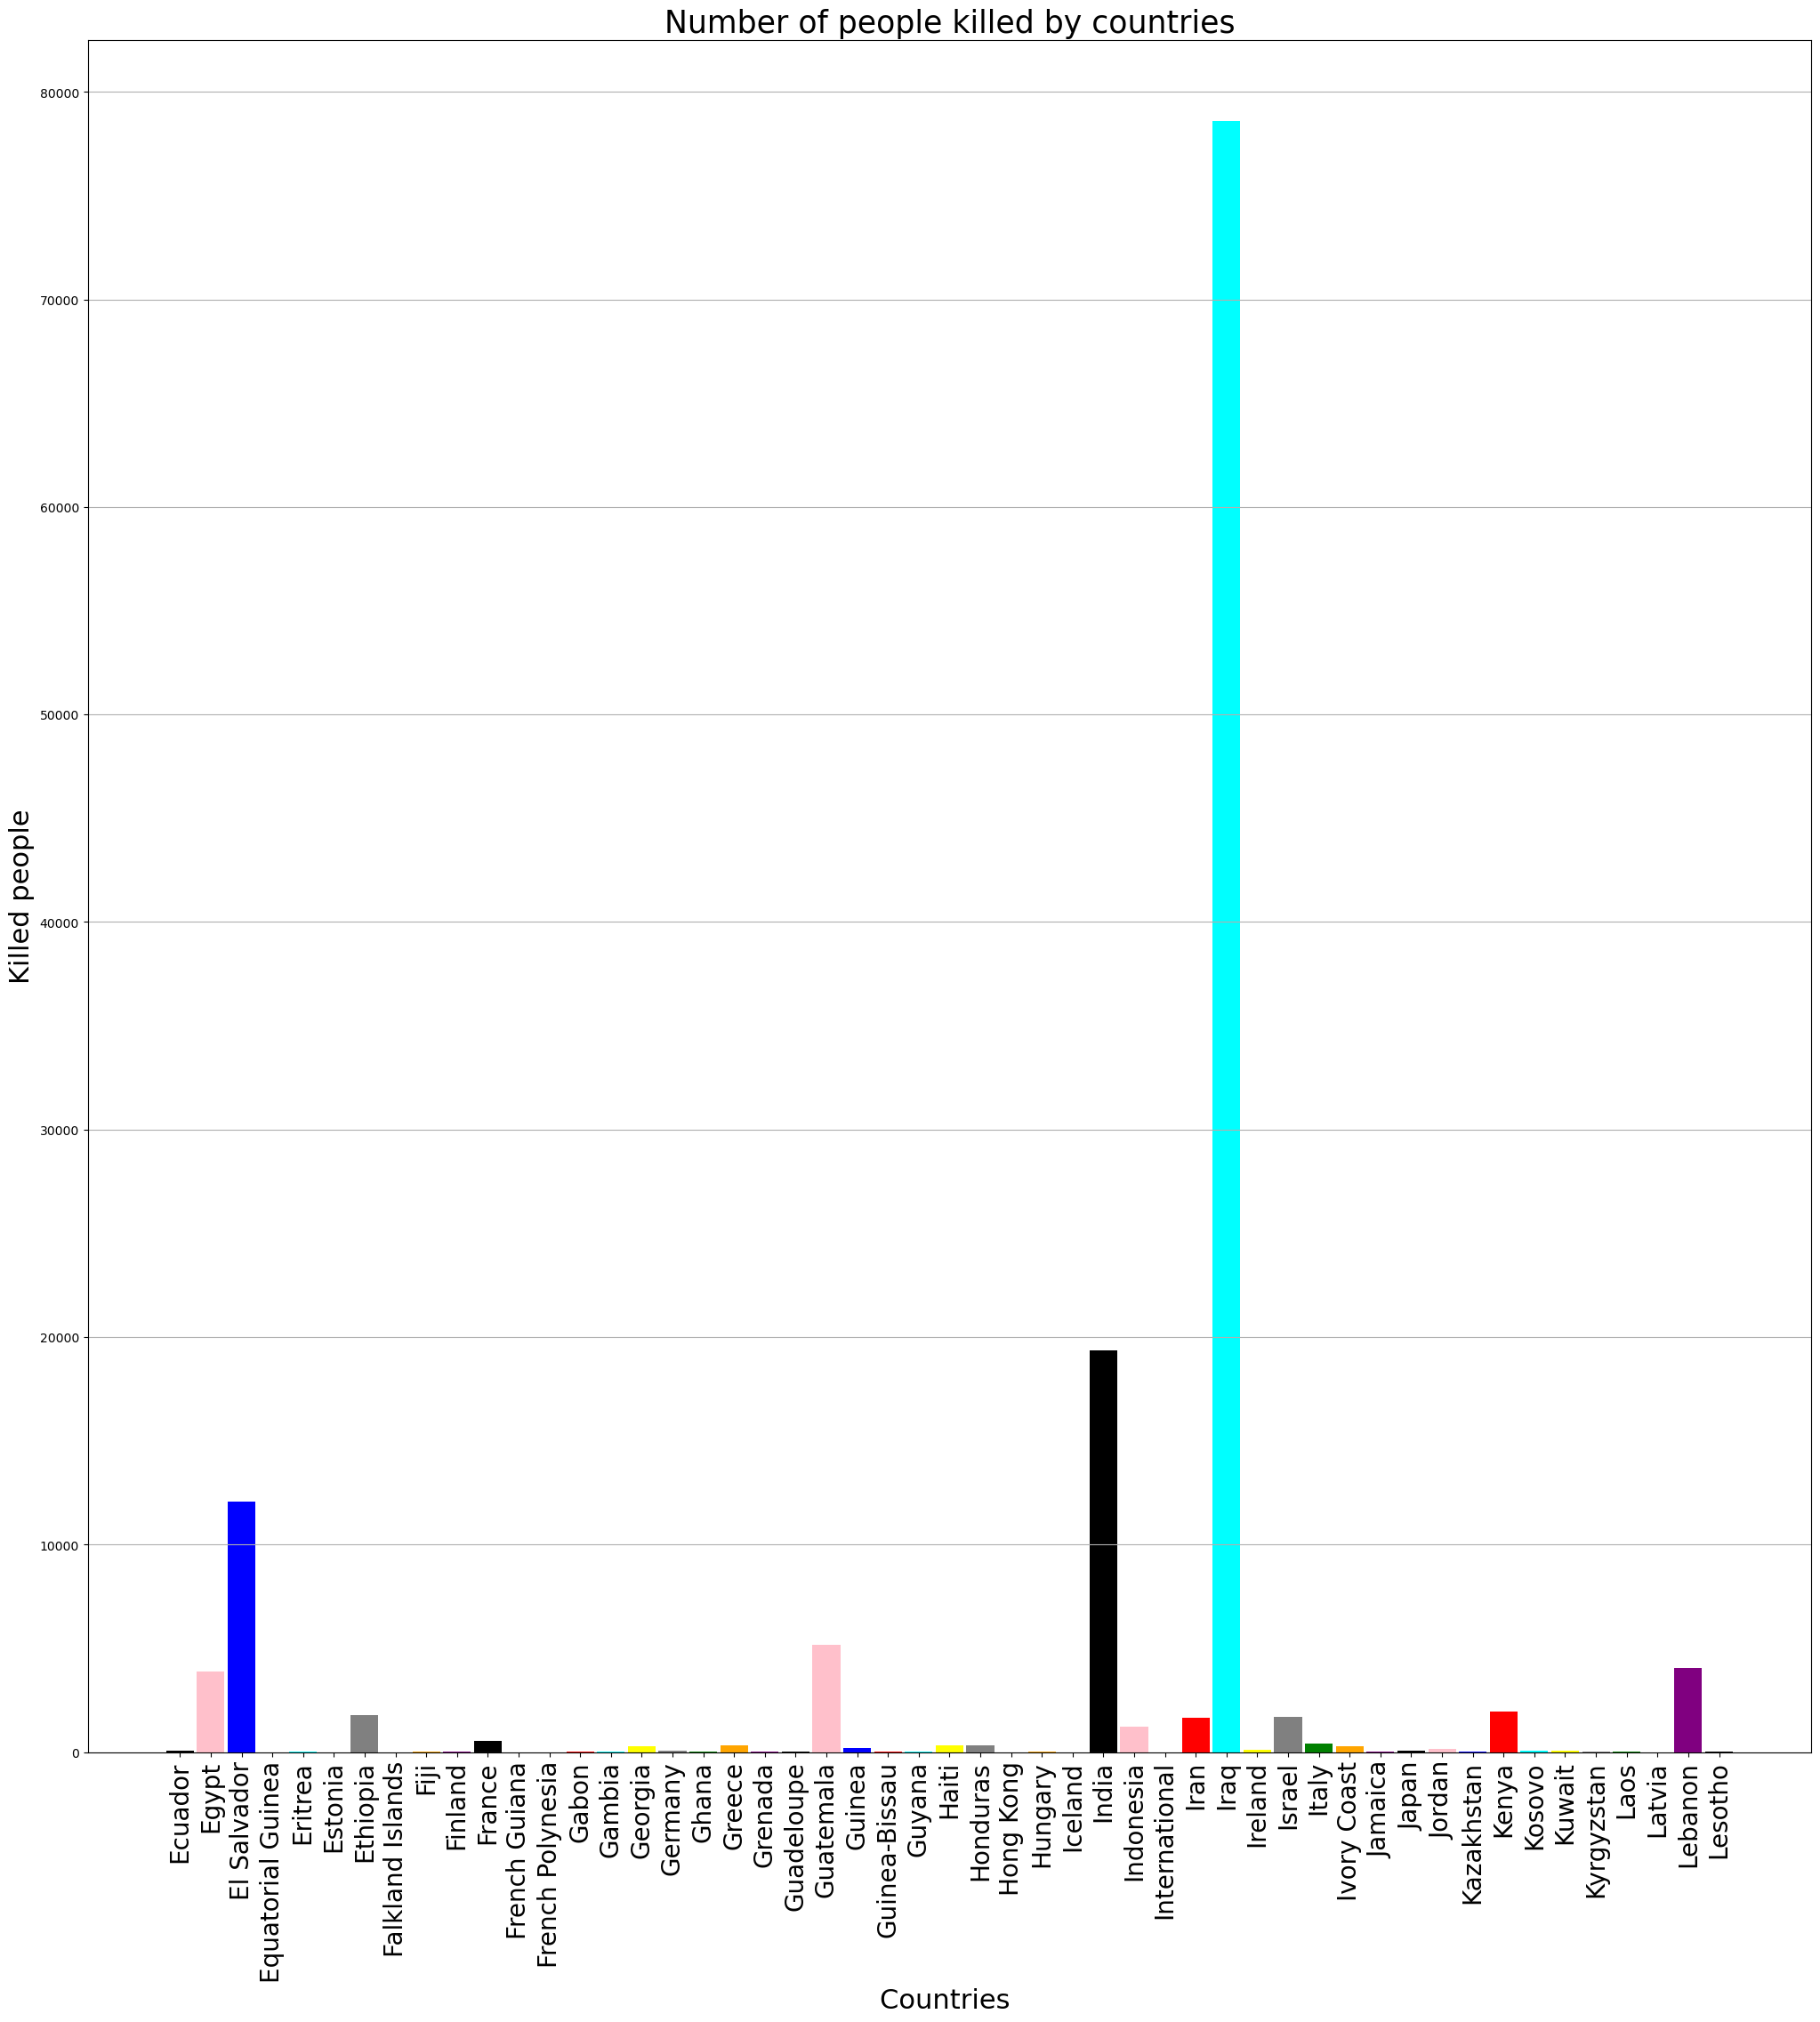

In [ ]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['black','pink','blue','red','cyan','yellow','gray','green','orange','purple']
fig,ax = plt.subplots(1,1)
ax.yaxis.grid(True)
fig_size = plt.rcParams['figure.figsize']
fig_size[0] = 20
fig_size[1] = 20
plt.rcParams['figure.figsize'] = fig_size
plt.bar(index,values,color = colors,width=0.9)
plt.ylabel("Killed people",fontsize=22)
plt.xlabel("Countries ",fontsize=22)
plt.xticks(index,labels,fontsize=20,rotation=90)
plt.title("Number of people killed by countries",fontsize=25)
plt.show()




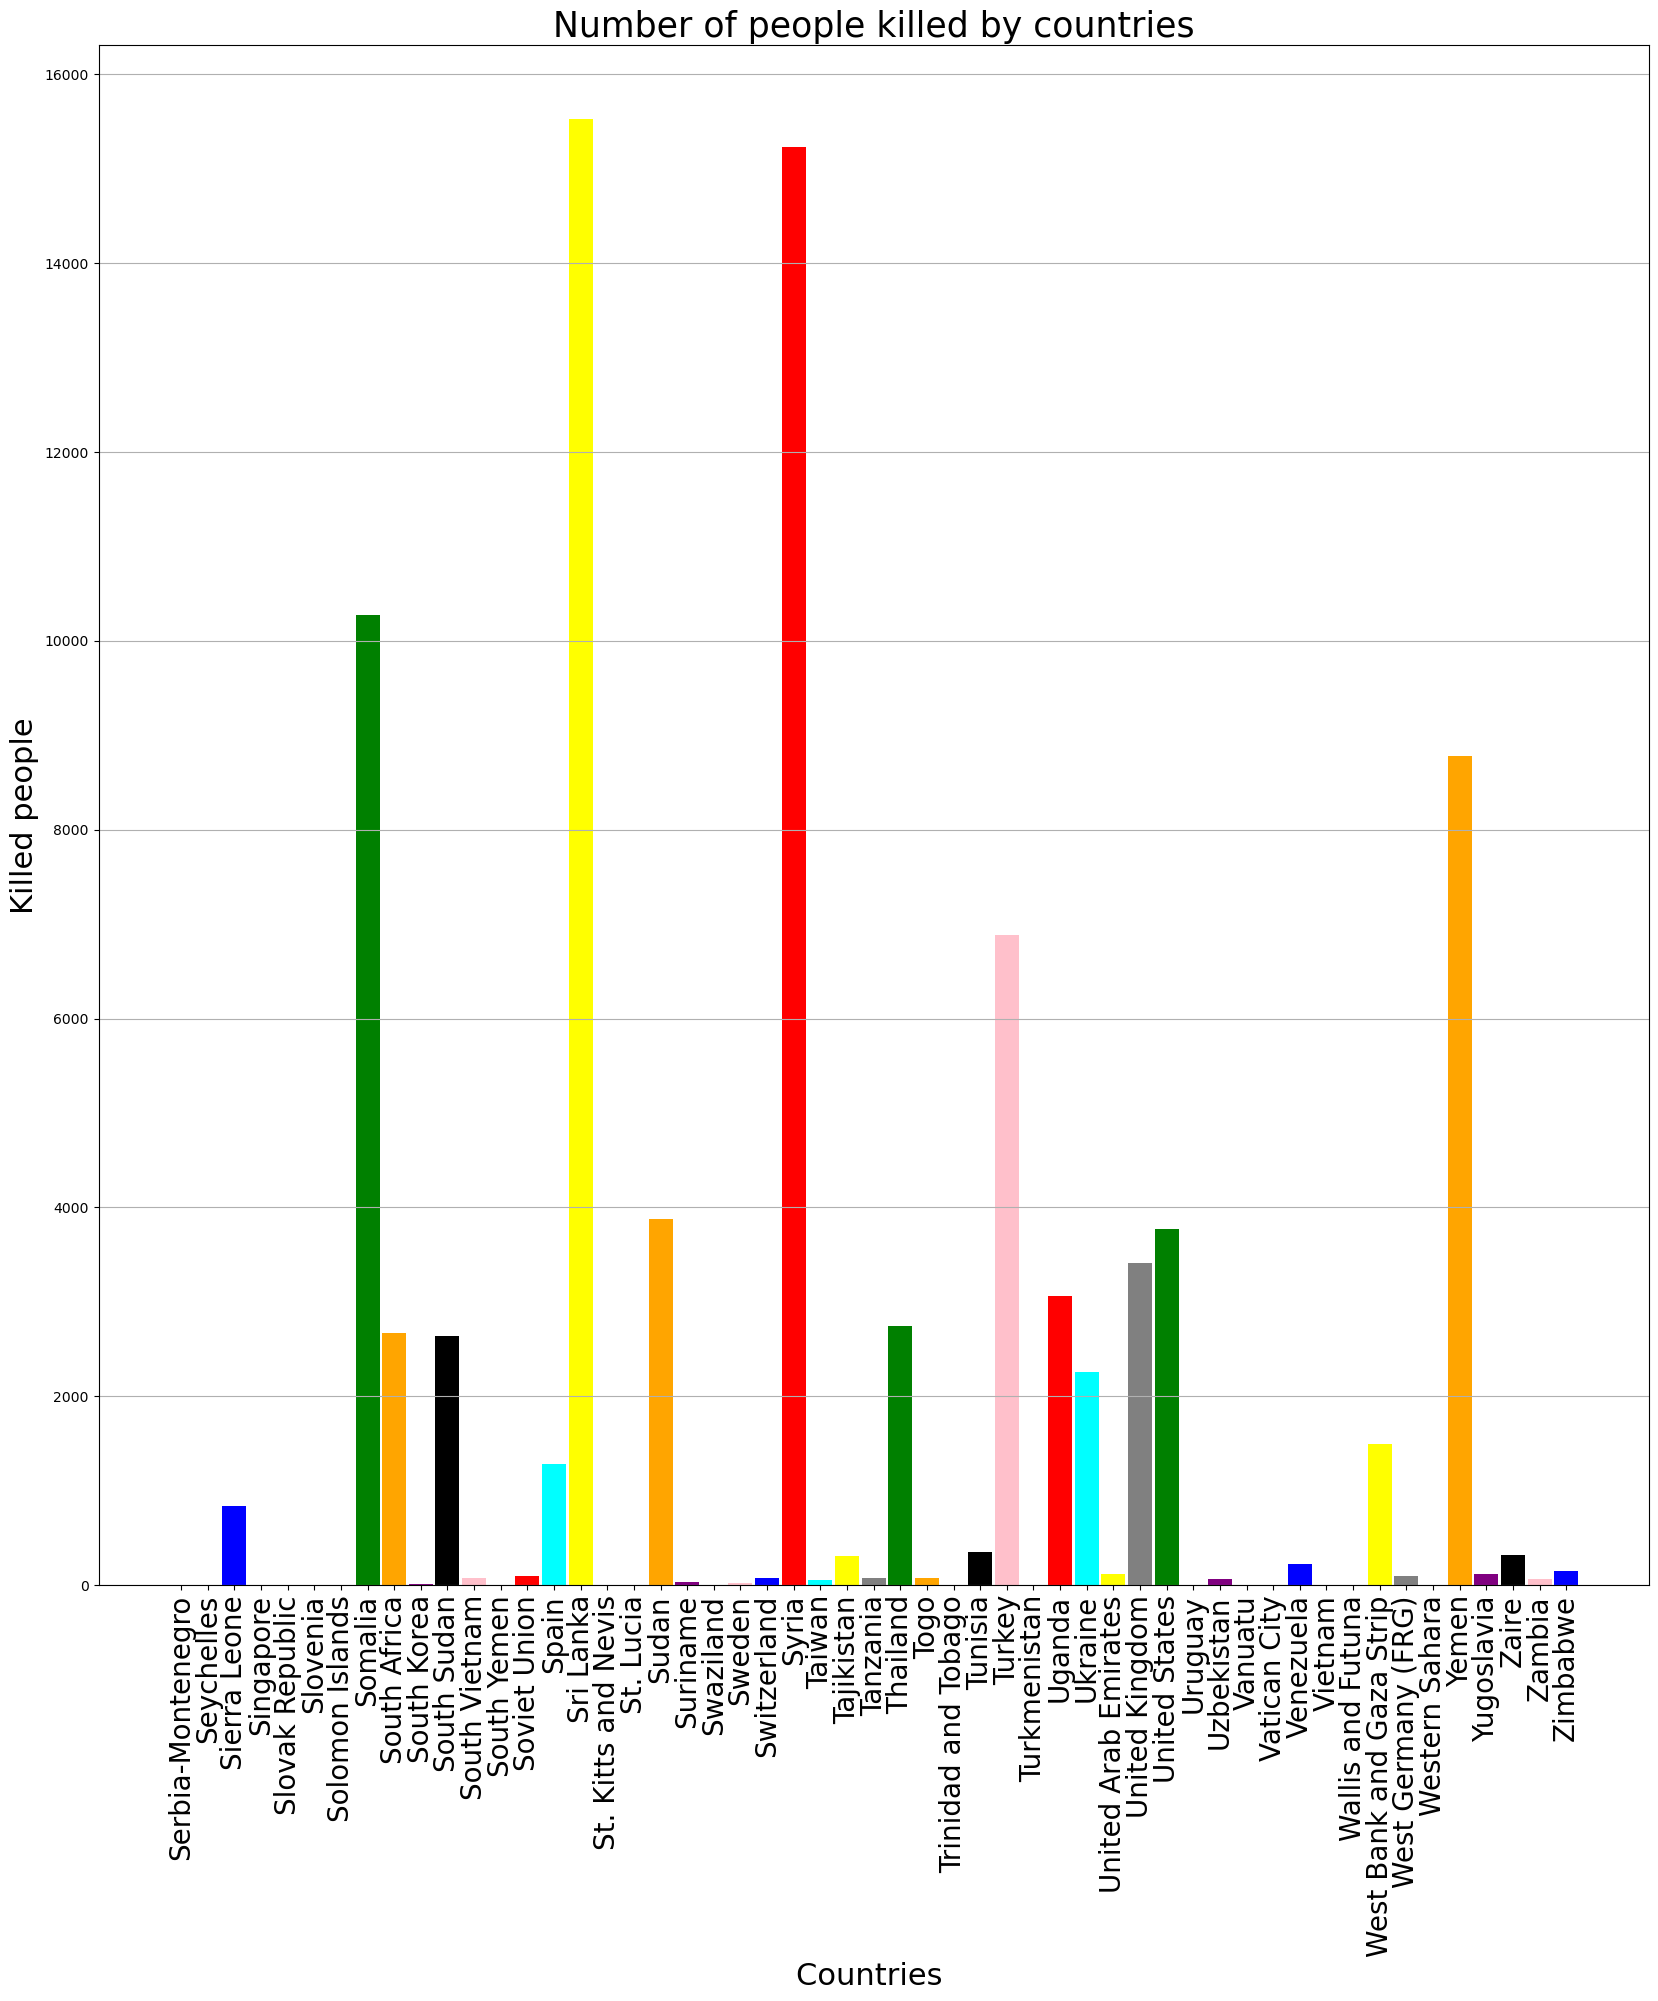

In [ ]:
labels = countryKillFormatData.columns.tolist()
labels = labels[152:206]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]
colors = ['black','pink','blue','red','cyan','yellow','gray','green','orange','purple']
fig,ax = plt.subplots(1,1)
ax.yaxis.grid(True)
fig_size = plt.rcParams['figure.figsize']
fig_size[0] = 25
fig_size[1] = 25
plt.rcParams['figure.figsize'] = fig_size
plt.bar(index,values,color = colors,width=0.9)
plt.ylabel("Killed people",fontsize=22)
plt.xlabel("Countries ",fontsize=22)
plt.xticks(index,labels,fontsize=20,rotation=90)
plt.title("Number of people killed by countries",fontsize=25)
plt.show()


